In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scripts import project_functions as pf

In [2]:
# Load data from National Names
national_df = pf.load_and_process_one('../../data/raw/national/NationalNames.csv')
# Load 4 parts of raw data on State Names
state_df = pf.load_and_process_many("../../data/raw/state")


In [11]:
state_df # Raw data set from all states

,Name,Year,Gender,State,Count
0,Mary,1910,F,AK,14
1,Annie,1910,F,AK,12
2,Anna,1910,F,AK,10
3,Margaret,1910,F,AK,8
4,Helen,1910,F,AK,7
...,...,...,...,...,...
5647421,Seth,2014,M,WY,5
5647422,Spencer,2014,M,WY,5
5647423,Tyce,2014,M,WY,5
5647424,Victor,2014,M,WY,5


## Tasks
- Separate the states into 4 regions: Western, southern, eastern and northern.
- Compare the top five most popular girls/boys name in four different regions (half for Jamie, half for Rita).
- North East and South is the main focus for Jamie.

## Analysis

### Filtering north east and south

In [4]:
# Note that the project_fuctions module includes list of abbreviations for states separated in regions
# Let's slice out only the north east and south

n_df = state_df.loc[state_df["State"].isin(pf.NORTH_EAST)].reset_index(drop=True)
n_df

,Name,Year,Gender,State,Count
0,Mary,1910,F,CT,304
1,Helen,1910,F,CT,170
2,Anna,1910,F,CT,131
3,Margaret,1910,F,CT,99
4,Dorothy,1910,F,CT,90
...,...,...,...,...,...
1077883,Richard,2014,M,VT,5
1077884,Rowan,2014,M,VT,5
1077885,Simon,2014,M,VT,5
1077886,Skyler,2014,M,VT,5


In [5]:
s_df = state_df.loc[state_df["State"].isin(pf.SOUTH)].reset_index(drop=True)
s_df

,Name,Year,Gender,State,Count
0,Mary,1910,F,AL,875
1,Annie,1910,F,AL,482
2,Willie,1910,F,AL,257
3,Mattie,1910,F,AL,232
4,Ruby,1910,F,AL,204
...,...,...,...,...,...
2173016,Pierce,2014,M,WV,5
2173017,Quinton,2014,M,WV,5
2173018,Reece,2014,M,WV,5
2173019,Sterling,2014,M,WV,5


### Some initial exploration

In [32]:
# We see that there are more than 1 million collected record and 5 variable for each observation 
n_df.shape

(1077888, 5)

In [35]:
# We have 5 variables for each observation
n_df.columns

Index(['Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')

In [34]:
# We see that there are more than 2 million collected record and 5 variable for each observation 
s_df.shape

(2173021, 5)

In [36]:
# We have 5 variables for each observation
s_df.columns

Index(['Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')

In [45]:
# General inspection
# We see that there are 3 categorical variable in the dataframe with other 2 numerical variable (Year and Count)
# Here, we can see that are 15817 unique names in this region
# There are 11 states recorded that equal to total number of states in this region. 
# This means all states participates in this survey
# It is not clear whether John is the most popular all of times since we also have a count column
n_df.describe(include=[object]).T

,count,unique,top,freq
Name,1077888,15817,John,1515
Gender,1077888,2,F,611881
State,1077888,11,NY,277809


In [37]:
# General inspection
# We see that there are 3 categorical variable in the dataframe with other 2 numerical variable (Year and Count)
# Here, we can see that are 20860 unique names in this region
# There are 17 states recorded that equal to total number of states in this region. 
# This means all states participates in this survey
# It is not clear whether Jessie is the most popular all of times since we also have a count column
s_df.describe(include=[object]).T

,count,unique,top,freq
Name,2173021,20860,Jessie,2991
Gender,2173021,2,F,1196486
State,2173021,17,TX,324133


In [43]:
# Summary on numerical values do not give any useful information. Let's skip it.
n_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1077888.0,1972.568780,29.206224,1910.0,1951.0,1977.0,1998.0,2014.0
Count,1077888.0,64.282026,244.034990,5.0,7.0,13.0,36.0,10023.0


In [44]:
# Same for south. Let's skip it
s_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2173021.0,1970.950681,30.260875,1910.0,1946.0,1975.0,1998.0,2014.0
Count,2173021.0,47.601974,134.264750,5.0,7.0,13.0,34.0,5060.0


### Find top 5 all times and compare between regions

In [6]:
# For the north east
n_name = (n_df.groupby(by="Name")
              .aggregate("sum")
              .drop(columns=["Year"]) # We do not analyze with time
              .sort_values(by="Count")
              .reset_index()
         )
top5_n,low5_n = n_name.tail().reset_index(drop=True).sort_index(ascending=False), n_name.head()

# For the south
s_name = (s_df.groupby(by="Name")
              .aggregate("sum")
              .drop(columns=["Year"]) # We do not analyze with time
              .sort_values(by="Count")
              .reset_index()
         )
top5_s,low5_s = s_name.tail().reset_index(drop=True).sort_index(ascending=False), n_name.head()

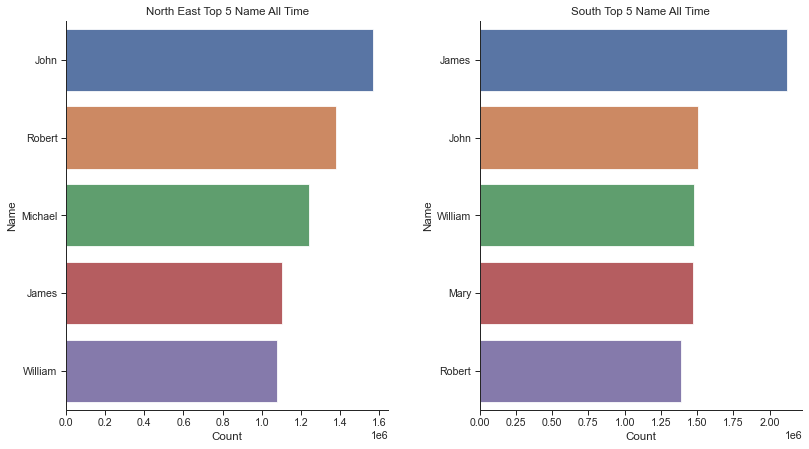

In [7]:
# Check similarity between 2 regions
sns.set_theme(context="paper", style="ticks",  font_scale=1.2)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
# North graph
north = sns.barplot(y="Name",
            x="Count",
            data=top5_n,
            order=top5_n["Name"],
            ax=ax[0]
            )
north.set_title("North East Top 5 Name All Time")

# South graph
south = sns.barplot(y="Name",
            x="Count",
            data=top5_s,
            order=top5_s["Name"],
            ax=ax[1])
south.set_title("South Top 5 Name All Time")

# Show plot
sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

#### Observations

- We can see that top 5 in these 2 regions are quite similar with the appearance of **James, William, Robert and John**. They differ in that North has **Michael** in top 5 while **Mary** replaces Michael in the South.

- All names in top 5 list in both region pass the mark of <mark>1 million</mark> count of all time. Maximum count in the *North East* is almost <mark>1.6 millions</mark> while that of the *South* surpasses <mark>2 millions</mark>.

- In the **North East** region, **John is the most popular name all times**, followed by Robert. James is at the last of the list.

- In the **South region**, however, **James appears to the most popular name of all times*8, followed by John, who takes the top in the South.



### Observe the top 5 name in each region from 1910 to 2014

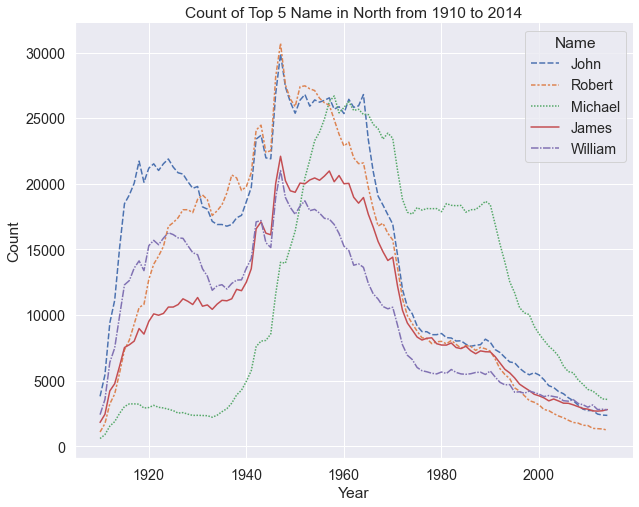

In [136]:
## Need to do something
n_year = (n_df.loc[n_df["Name"].isin(top5_n["Name"])]
              .pivot_table(index="Year",columns="Name",values="Count", aggfunc=np.sum)
         )

# Setting themes
sns.set_theme(style="darkgrid", font_scale=1.3, )
plt.figure(figsize=(10,8))
n_plot = sns.lineplot(data=n_year, 
                      hue_order=top5_n.Name,
                     )
n_plot.set(ylabel="Count", 
           title="Count of Top 5 Name in North from 1910 to 2014",
           )
sns.despine()
plt.show()

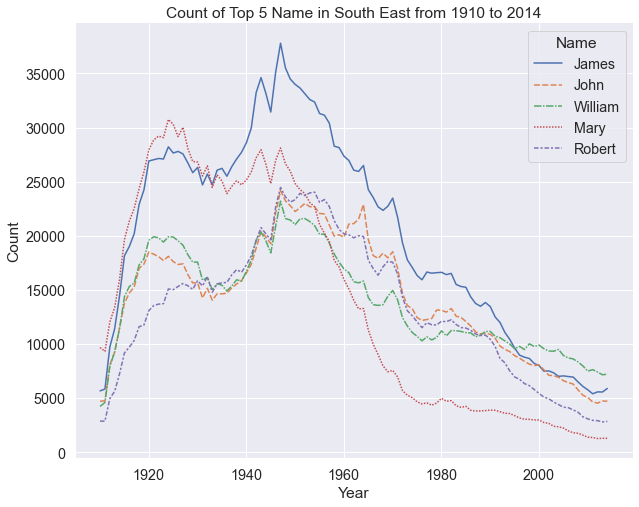

In [137]:
## Need to do something
s_year = (s_df.loc[s_df["Name"].isin(top5_s["Name"])]
              .pivot_table(index="Year",columns="Name",values="Count", aggfunc=np.sum)
         )

# Setting themes
sns.set_theme(style="darkgrid", font_scale=1.3, )
plt.figure(figsize=(10,8))
s_plot = sns.lineplot(data=s_year, 
                      hue_order=top5_s.Name,
                     )
s_plot.set(ylabel="Count", 
           title="Count of Top 5 Name in South East from 1910 to 2014",
           )
sns.despine()
plt.show()

#### Observations

- The pattern for top 5 names in the North East is quite similar. All names saw an **initial surge from 1910 to 1920**, which was **followed by a slight drop**. Then, all seemed to **hit their peaks around 1945**. After that, all followed a generally **sharp decrease until 2014**.

- The pattern in the South is also similar that of North East. However, the continuing decrease started earlier than North East.

- The slightly drop in 1945 could result from the war. For the dramatic drop, it could result from a modern society, where the number of children per family is restricted.

### Compare the number of male and female names all times in each region

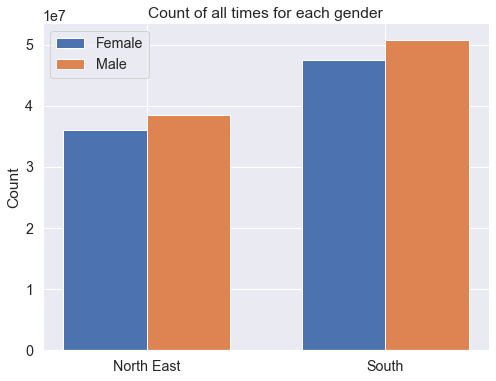

In [180]:
filter_funct = lambda ns: ["North East" if state in pf.NORTH_EAST else "South" for state in ns.State]
both_ns = (s_df.append(n_df)
           .assign(Region= filter_funct)
           .pivot_table(index="Region", columns="Gender",values="Count", aggfunc=np.sum)
           .reset_index()
          )
                   
sns.set_theme(style="darkgrid", font_scale=1.3, )
fig, ax = plt.subplots(1,1, figsize=(8,6))


width = 0.35  # the width of the bars
x= np.arange(2)

ax.bar(x=x-width/2,
       height=both_ns["F"],
       width= width,
       label="Female"
      )
ax.bar(x=x+width/2,
       height=both_ns["M"],
       width= width,
       label="Male"
      )

ax.set_ylabel('Count')
ax.set_title('Count of all times for each gender')
ax.set_xticks(x)
ax.set_xticklabels(["North East", "South"])
ax.legend()

sns.despine()
plt.show()

### Observations
- There are more babies with female names in both regions from 1910 to 2014. The difference is quite large. However, the axis scale does not give an accurate picture.

- Suddenly, we can see that there are more babies born in the south than the North East.

### Explore top 5 in each Gender

In [178]:
## To do